# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-18-trescuerpos_puntos_equilibiro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del problema de los tres cuerpos: puntos de equilibrio de Lagrange

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Los puntos de equilibrio de Lagrange

La función cuyas raíces nos dan la posición de los puntos de equilibrio de Lagrange es:

In [1]:
def funcion_puntos_colineales(x,alfa):
    x1=-alfa
    x2=1-alfa
    f=(1-alfa)*(x-x1)/abs(x-x1)**3+alfa*(x-x2)/abs(x-x2)**3-x
    return f

Un gráfico de la función es:

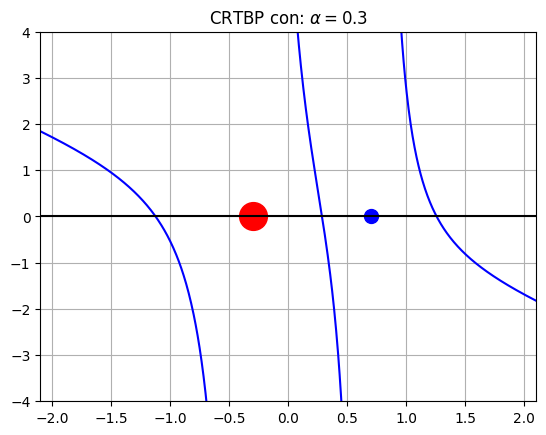

In [2]:
#Propiedades del sistema
alfa=0.3
rango=3*(1-alfa)

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Calcule los valores de la función
from numpy import linspace
xs=linspace(-rango,rango,1000)
fs=funcion_puntos_colineales(xs,alfa)

#Cuando la función cambie de signo ponga nan
from numpy import diff,nan
fs[:-1][diff(fs)>0]=nan

#Grafíque
ax.plot(xs,fs,'b-',ms=2)

#Posiciones de las partículas masivas
ax.plot([-alfa],[0],'ro',ms=20)
ax.plot([1-alfa],[0],'bo',ms=10)

#Decoración
ax.axhline(0,color='k')
ax.set_title(f"CRTBP con: $\\alpha={alfa}$")
ax.set_xlim((-rango,rango));
ax.set_ylim((-4,+4));
ax.grid()

Calculemos la posición del punto de Lagrange L1:

In [3]:
alfa=0.3
from scipy.optimize import bisect
x_L1_num=bisect(funcion_puntos_colineales,0,1-1.01*alfa,args=(alfa,))

print(f"Posición precisa de L1 (alfa = {alfa}) = {x_L1_num}")

Posición precisa de L1 (alfa = 0.3) = 0.28612978205071515


Comparemos con el valor obtenido por medio de la aproximación:

In [4]:
x_L1_aprox=1-alfa-(alfa/3)**(1./3)

print(f"Posición aproximada de L1 (alfa = {alfa}) = {x_L1_aprox}")

Posición aproximada de L1 (alfa = 0.3) = 0.23584111663872204


Hagamos una comparación sistemática del valor calculado usando la solución numérica y las aproximaciones vistas en el texto: 

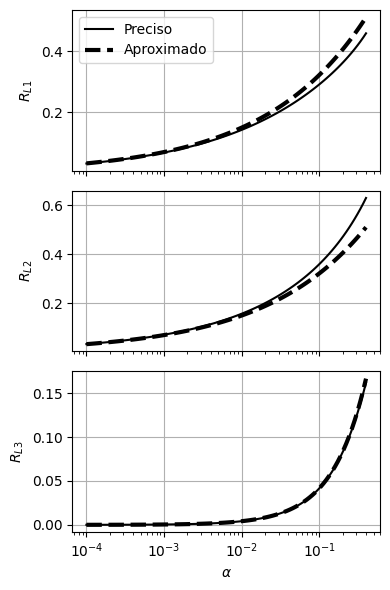

In [5]:
#Valores de alfa
from numpy import log10,logspace
log_alfas=linspace(log10(1e-4),log10(4e-1),100)

#Calcula posición relativa de los puntos
Ls=[]
for log_alfa in log_alfas:
    from scipy.optimize import bisect
    alfa=10**log_alfa
    Ls+=[[
        #Valores precisos
        (1-alfa)-bisect(funcion_puntos_colineales,0,1-2*alfa,args=(alfa,)),
        bisect(funcion_puntos_colineales,1-0.5*alfa,2,args=(alfa,))-(1-alfa),
        -1-bisect(funcion_puntos_colineales,-2,-0.5,args=(alfa,)),
        #Valores aproximados
        (alfa/3)**(1./3),
        (alfa/3)**(1./3),
        5*alfa/12
    ]]
from numpy import array,abs
Ls=array(Ls)

#Grafica
fig,axs=plt.subplots(3,1,figsize=(4,6),sharex=True)
ax=axs[0]
ax.plot(10**log_alfas,Ls[:,0],'k-',label='Preciso')
ax.plot(10**log_alfas,Ls[:,3],'k--',label='Aproximado',lw=3)
ax=axs[1]
ax.plot(10**log_alfas,Ls[:,1],'k-')
ax.plot(10**log_alfas,Ls[:,4],'k--',lw=3)
ax=axs[2]
ax.plot(10**log_alfas,Ls[:,2],'k-')
ax.plot(10**log_alfas,Ls[:,5],'k--',lw=3)

#Decora
axs[2].set_xlabel("$\\alpha$")
axs[0].set_ylabel("$R_{L1}$")
axs[1].set_ylabel("$R_{L2}$")
axs[2].set_ylabel("$R_{L3}$")
axs[0].legend()
for ax in axs:
    ax.set_xscale("log");
    ax.grid()
fig.tight_layout()

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)